In [2]:
import pandas as pd
import numpy as np
import re
import random
from scipy.stats import spearmanr
import seaborn as sn
import matplotlib.pyplot as plt

In [34]:
def set_rank(rank_range):
    range_min_max = re.search('(\d+)?-?(\d+)?\+?', rank_range)

    if range_min_max[2] is None:
        return range_min_max[1]
    else:
        rank = random.randint( int(range_min_max[1]), int(range_min_max[2]) )
        return rank

In [116]:
def kendall_w(rdata):
    m = 4
    n = len(rdata)

    Ri = rdata.sum(axis = 1)
#     Rm = np.sum(Ri) / n
    
    T = 0
    for ranking in rdata:
        vc = rdata[ranking].value_counts()
        d = vc[vc > 1]
        t = np.sum(list(map(lambda t: t ** 3 - t, d)))
        T = T + t
    
    W = (12 * np.sum(Ri) - 3 * m ** 2 * n * (n + 1) ** 2) / (m ** 2 * n * (n ** 2 - 1) - m * T)
#     S = np.sum( (Ri - Rm) ** 2 )
#     W = (12 * S) / ((m ** 2) * (n ** 3 - n) - 3 * (n + 1) / (n - 1))
    
    rS = (m * W - 1) / (m - 1)

    return (T, W, rS)

In [117]:
rankings = ['THE', 'QS', 'CWUR', 'ARWU']
countries = {
    'AG': 'Argentina', 'AU': 'Austria', 'AUS': 'Australia', 'BE': 'Belgium', 'BEL': 'Belarus', 'BZ': 'Brazil',
    'CA': 'Canada', 'CH': 'China', 'CHI': 'Chile', 'COL': 'Colombia', 'CZ': 'Czech', 'DN': 'Denmark',
    'EG': 'Egypt', 'ES': 'Estonia', 'FI': 'Finland', 'FR': 'France', 'GE': 'Germany', 'GR': 'Greece',
    'IN': 'India', 'ID': 'Indonesia', 'IR': 'Ireland', 'IRN': 'Iran', 'IT': 'Italy', 'IS': 'Izrael',
    'JP': 'Japan', 'KO': 'Korea', 'KZ': 'Kazakhstan', 'LE': 'Lebanon', 'MA': 'Malaysia', 'ME': 'Mexico',
    'NE': 'Netherlands', 'NO': 'Norway', 'NZ': 'New Zealand', 'PH': 'Philippines', 'PAK': 'Pakistan',
    'POL': 'Poland', 'POR': 'Portugal', 'RU': 'Russia', 'SA': 'South Africa', 'SAU': 'Saudi Arabia',
    'SG': 'Singapore', 'SP': 'Spain', 'SW': 'Sweden', 'TH': 'Thailand', 'UA': 'Ukraine',
    'UAE': 'United Arab Emirates', 'UK': 'United Kingdom', 'US': 'United States of America'
}

data = (pd.read_excel('Rankings/All-2020.xlsx')).iloc[:500, :29]
uni = data.University
data = data.set_index('University')
data = data.dropna()

data['Country'] = [countries[code] for code in data.loc[:, 'Country Code']]

# Fill ranged ranks (101-150, 800-1000)
for ranking in rankings:
    for rank_i in range(len(data[ranking])):
        rank = data[ranking][rank_i]
        if isinstance(rank, str):
            data.loc[:, ranking][rank_i] = set_rank(rank)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [119]:
# Convert to ranks
rdata = (data.reset_index())[rankings].rank(axis = 0, ascending = True)
rdata['University'] = uni
rdata = rdata.set_index('University')

data.THE = rdata.THE
data.QS = rdata.QS
data.CWUR = rdata.CWUR
data.ARWU = rdata.ARWU
rdata.head()

,THE,QS,CWUR,ARWU
University,,,,
Massachusetts Institute of Technology (MIT),5.0,1.0,2.0,4.0
Stanford University,4.0,2.0,3.0,2.0
Harvard University,7.0,3.0,1.0,1.0
University of Oxford,1.0,4.0,5.0,6.0
California Institute of Technology (Caltech),2.0,5.0,11.0,8.0


In [121]:
print(kendall_w(rdata))

(552, -3.026712238422437, -4.368949651229916)


In [106]:
# vc = rdata.QS.value_counts()
# sm = vc[vc > 1]
# sm

# lambda x: x ** 3 - x

print(np.sum(list(map(lambda t: t ** 3 - t, [2, 3, 2, 3]))))

60


In [8]:
# m = 4
# n = len(rdata)

# Ri = rdata.sum(axis = 1)
# # print('Ri:', Ri)

# Rm = np.sum(Ri) / n
# # Rm = m * (n + 1) / 2
# print('Rm:', Rm)

# S = np.sum( (Ri - Rm) ** 2 )
# print('S:', S)

# W = (12 * S) / ((m ** 2) * (n ** 3 - n))
# print('W:', W)

# W = (12 * S) / ((m ** 2) * (n ** 3 - n) - 3 * (n + 1) / (n - 1))
# print('W:', W)

# rS = (m * W - 1) / (m - 1)
# print('rS:', rS)

Rm: 342.0
S: 5167138.0
W: 0.7888230408949628
W: 0.788823071356972
rS: 0.7184307618092961


In [39]:
# rdata = unis.rank(axis = 0, ascending = False)
# rdata.head()

NameError: name 'unis' is not defined

[[1.         0.73694039 0.75090698 0.75260008]
 [0.73694039 1.         0.57266088 0.57938159]
 [0.75090698 0.57266088 1.         0.91233556]
 [0.75260008 0.57938159 0.91233556 1.        ]]


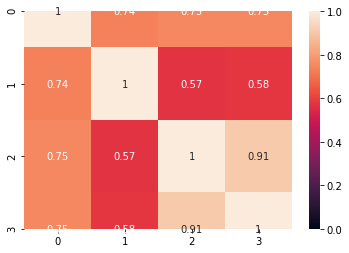

In [13]:
# All data
corr_matrix = spearmanr(data.loc[:, rankings])[0]
print(corr_matrix)
sn.heatmap(corr_matrix, vmin = 0, vmax = 1, annot = True)
plt.savefig('spearman_corr.png')

[[1.         0.80159255 0.78471329 0.80619445]
 [0.80159255 1.         0.63512561 0.66289404]
 [0.78471329 0.63512561 1.         0.90837802]
 [0.80619445 0.66289404 0.90837802 1.        ]]


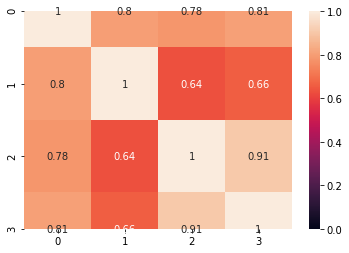

In [34]:
# 1-100
corr_matrix = spearmanr(data.loc[:, rankings][1:100])[0]
print(corr_matrix)
sn.heatmap(corr_matrix, vmin = 0, vmax = 1, annot = True)
plt.savefig('spearman_corr_1-100.png')

[[1.         0.31112614 0.5958856  0.58744587]
 [0.31112614 1.         0.16856838 0.21251462]
 [0.5958856  0.16856838 1.         0.89659362]
 [0.58744587 0.21251462 0.89659362 1.        ]]


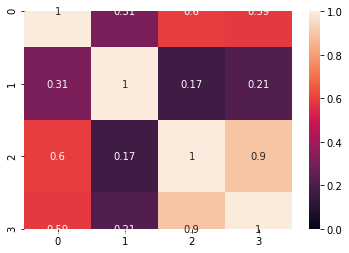

In [35]:
# 101-200
corr_matrix = spearmanr(data.loc[:, rankings][101:200])[0]
print(corr_matrix)
sn.heatmap(corr_matrix, vmin = 0, vmax = 1, annot = True)
plt.savefig('spearman_corr_101-200.png')

In [120]:
data.to_csv(r'~/Google Drive/Университет/Магистратура/Research/Programs/Processed.csv')

In [11]:
uni_per_country = data.groupby('Country').count().loc[:, 'THE']

In [12]:
data.groupby('Country').count()

,THE,QS,CWUR,ARWU,Country Code,Size,Focus,Research,Age,Status,...,International_Students,Percentage_Female,Percentage_Male,Teaching,Research.1,Citations,Industry_Income,International_Outlook,Score_Result,Overall_Ranking
Country,,,,,,,,,,,,,,,,,,,,,
Australia,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Austria,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
Belgium,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Brazil,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Canada,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
Chile,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
China,21,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,21,21
Czech,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Denmark,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


In [13]:
import geopandas
import geoplot

world = geopandas.read_file(
    geopandas.datasets.get_path('naturalearth_lowres')
)
boroughs = geopandas.read_file(
    geoplot.datasets.get_path('nyc_boroughs')
)
collisions = geopandas.read_file(
    geoplot.datasets.get_path('nyc_injurious_collisions')
)

In [14]:
world['unis_num'] = [0] * len(world)
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,unis_num
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",0
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",0
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",0
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",0
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",0


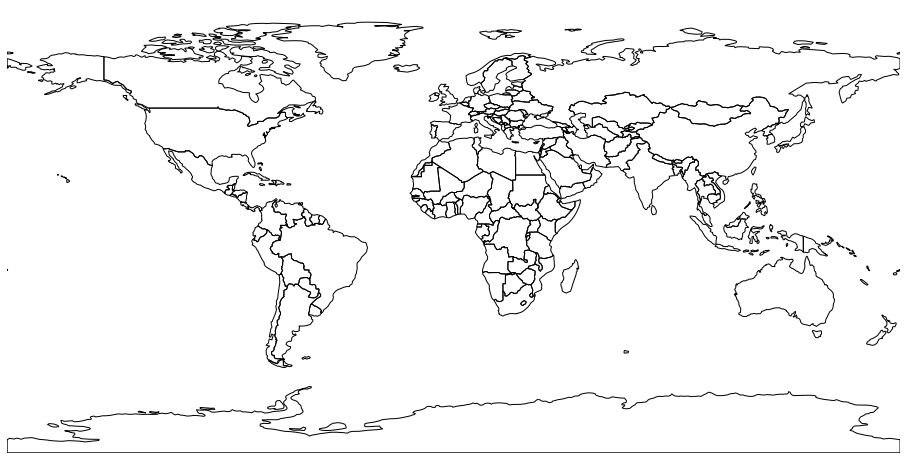

In [15]:
geoplot.polyplot(world, figsize=(16, 12))

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


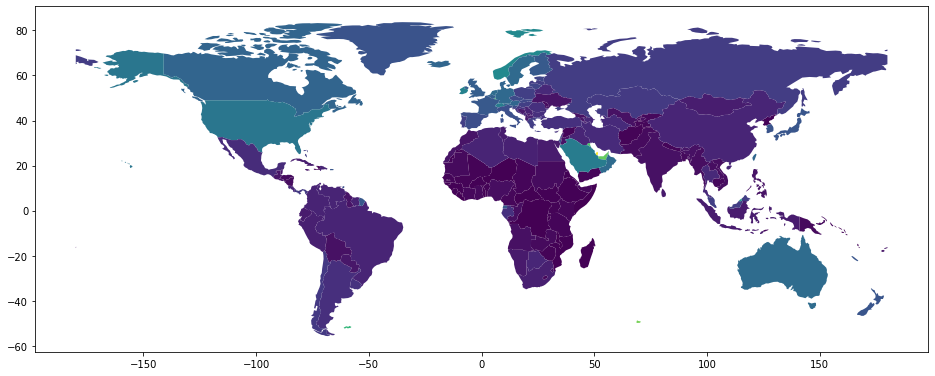

In [16]:
world = world[(world.pop_est > 0) & (world.name != 'Antarctica')]

for country in world.name:
    if len(data.loc[data.Country == country, :]) > 0:
        world.loc[world.name == country, 'unis_num'] = uni_per_country[country]

world['gdp_per_cap'] = world.gdp_md_est / world.pop_est
world.plot(column='gdp_per_cap', figsize=(16, 12));

In [17]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,unis_num,gdp_per_cap
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",0,0.009093
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",0,0.002791
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",0,0.001503
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",12,0.046991
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",57,0.056823


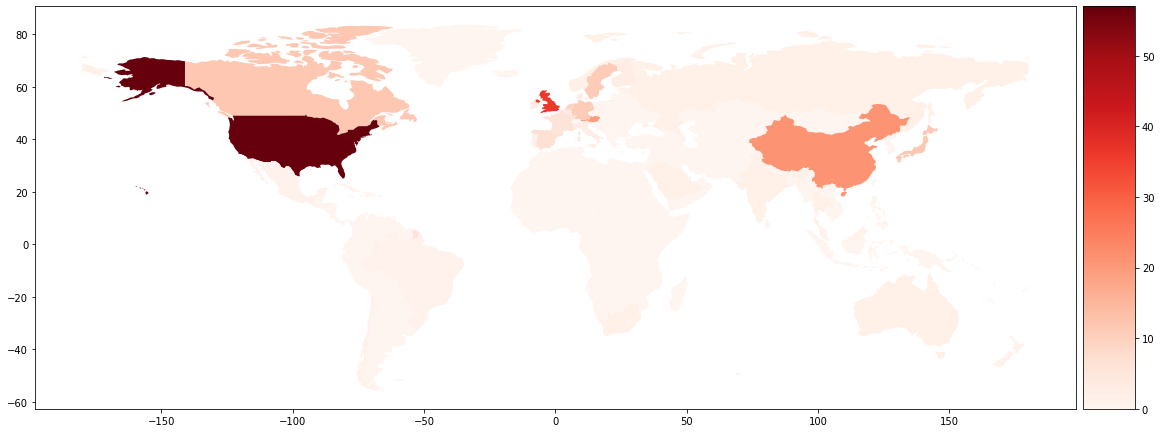

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1)
fig.set_figheight(14)
fig.set_figwidth(16)
fig.tight_layout()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
world.plot(column='unis_num', legend = True, ax = ax, figsize=(16, 14), cmap = 'Reds', cax = cax);
plt.savefig('world.png')